In [213]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.model_selection
import matplotlib.pyplot as mplt
%matplotlib inline

In [165]:
df = pd.read_csv('F:/My Softwares/study/poc/loan_train.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [166]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [167]:
pd.isnull(df['LoanAmount']).value_counts()

False    592
True      22
Name: LoanAmount, dtype: int64

In [168]:
pd.isnull(df['Loan_Amount_Term']).value_counts()

False    600
True      14
Name: Loan_Amount_Term, dtype: int64

In [169]:
pd.isnull(df['Credit_History']).value_counts()

False    564
True      50
Name: Credit_History, dtype: int64

In [170]:
pd.isnull(df).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [171]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [172]:
pd.isnull(df['LoanAmount']).value_counts()

False    614
Name: LoanAmount, dtype: int64

In [173]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [174]:
df['Self_Employed'].fillna('No', inplace=True)

In [175]:
pd.isnull(df['Self_Employed']).value_counts()

False    614
Name: Self_Employed, dtype: int64

In [176]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [177]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [178]:
pd.isnull(df['Loan_Amount_Term']).value_counts()

False    614
Name: Loan_Amount_Term, dtype: int64

In [179]:
pd.isnull(df).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [180]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [181]:
df['Gender'].fillna('Male', inplace=True)

In [182]:
pd.isnull(df).sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [183]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [184]:
df['Married'].fillna('Yes', inplace=True)

In [185]:
pd.isnull(df).sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [186]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

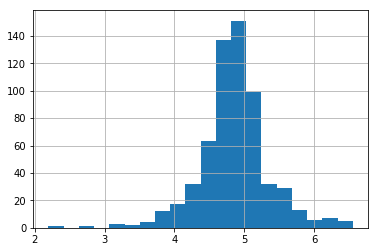

In [187]:
df['LoanAmount_log'].hist(bins=20)

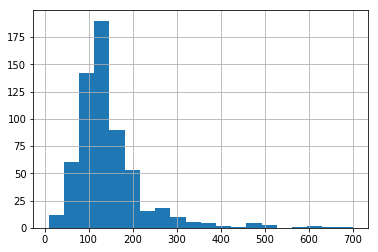

In [188]:
df['LoanAmount'].hist(bins=20)

In [189]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'] 

0       8.674026
1       8.714568
2       8.006368
3       8.505323
4       8.699515
5       9.170872
6       8.255569
7       8.619750
8       8.618305
9      10.077819
10      8.268732
11      8.375630
12      9.321792
13      8.453827
14      7.776954
15      8.507143
16      8.187577
17      8.163371
18      8.494334
19      8.716044
20      8.943767
21      9.357035
22      8.414274
23      8.572060
24      8.801168
25      9.165343
26      8.527539
27      8.569026
28      7.273786
29      8.671287
         ...    
584     8.456168
585     8.893298
586     8.247744
587     7.680176
588     8.465900
589     7.910591
590     8.766550
591     8.699515
592     9.143880
593     8.876126
594     9.687816
595     8.251403
596     8.906935
597     8.002025
598     9.206634
599     8.662159
600    10.647399
601     8.645762
602     8.648748
603     8.984318
604     9.392662
605     8.732305
606     8.682708
607     8.593784
608     8.552946
609     7.972466
610     8.320205
611     9.0254

In [190]:
df['TotalIncome']

0       5849.0
1       6091.0
2       3000.0
3       4941.0
4       6000.0
5       9613.0
6       3849.0
7       5540.0
8       5532.0
9      23809.0
10      3900.0
11      4340.0
12     11179.0
13      4693.0
14      2385.0
15      4950.0
16      3596.0
17      3510.0
18      4887.0
19      6100.0
20      7660.0
21     11580.0
22      4511.0
23      5282.0
24      6642.0
25      9560.0
26      5052.0
27      5266.0
28      1442.0
29      5833.0
        ...   
584     4704.0
585     7283.0
586     3819.0
587     2165.0
588     4750.0
589     2726.0
590     6416.0
591     6000.0
592     9357.0
593     7159.0
594    16120.0
595     3833.0
596     7383.0
597     2987.0
598     9963.0
599     5780.0
600    42083.0
601     5686.0
602     5703.0
603     7977.0
604    12000.0
605     6200.0
606     5900.0
607     5398.0
608     5182.0
609     2900.0
610     4106.0
611     8312.0
612     7583.0
613     4583.0
Name: TotalIncome, Length: 614, dtype: float64

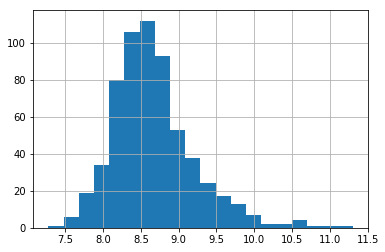

In [191]:
df['TotalIncome_log'].hist(bins=20)

In [192]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [193]:
df['Credit_History'].isnull().sum()

0

In [194]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [195]:
df['Dependents'].isnull().sum()

0

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
var_enc = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_enc:
    df[i] = le.fit_transform(df[i])

In [198]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [199]:
input = df.drop('Loan_ID', axis='columns')
input1 = input.drop('ApplicantIncome', axis='columns')
input2 = input1.drop('CoapplicantIncome', axis='columns')
input3 = input2.drop('TotalIncome', axis='columns')

In [200]:
input3.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,4.948760,8.699515


In [201]:
X = input3

In [202]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,4.948760,8.699515


In [203]:
y = input3['Loan_Status']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [205]:
len(X_train)

491

In [206]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [207]:
results = []
m_name = []

for name, model in models:
    kfold = sklearn.model_selection.KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold)
    results.append(cv_results)
    m_name.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR : 1.000000 (0.000000)
SVM : 0.674204 (0.088647)
KNN : 0.633388 (0.073048)
DT : 1.000000 (0.000000)


In [208]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)
predicted = DTree.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, predicted))
cm = confusion_matrix(y_test, predicted)
print(cm)

1.0
[[39  0]
 [ 0 84]]


Text(69,0.5,'Truth')

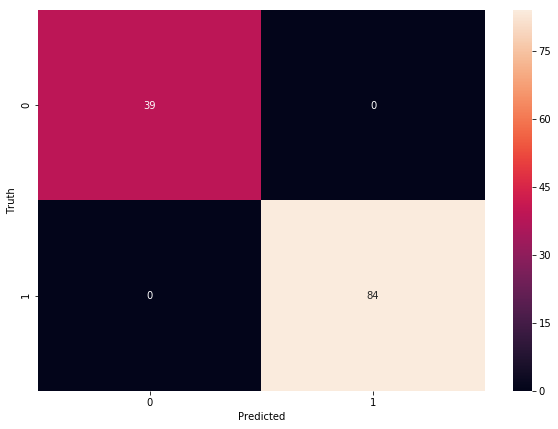

In [215]:
import seaborn as sn
mplt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
mplt.xlabel('Predicted')
mplt.ylabel('Truth')